## **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

## **Blinkit Sales Performance Analysis**
### **INTRODUCTION**

Understanding sales patterns, customer preferences, operational efficiency, and outlet performance is essential for optimizing business strategies within the fast-paced Quick Commerce (Q-Commerce) industry. Blinkit, one of India’s leading instant-delivery platforms, handles a massive volume of daily transactions across various product categories, outlet types, and customer segments.

This data analysis project aims to uncover actionable insights by examining Blinkit’s sales distribution, customer ratings, outlet characteristics, and product attributes. Through detailed visualizations and KPI-driven analysis, the project highlights the key factors influencing sales performance and helps identify opportunities for operational improvement, better inventory planning, and enhanced customer satisfaction.

The dataset contains information related to item types, fat content categories, outlet sizes, locations, establishment years, and customer feedback metrics. These variables are analyzed to understand how they contribute to overall sales trends and business outcomes.

### **Data Description**

The dataset used in this analysis includes the following fields:



**Item Type** – Category of the product sold (e.g., Dairy, Snacks, Frozen Foods).

**Fat Content** – Classification of products based on fat level (e.g., Low Fat, Regular).

**Item Weight** – Weight of the product in kilograms.

**Sales** – Total sales value generated for each item.

**Outlet Size** – Size of the outlet (e.g., Small, Medium, High).

**Outlet Location Type** – Tier-based geographical segmentation (Tier 1, Tier 2, Tier 3).

**Outlet Establishment Year** – Year in which the outlet was opened.

**Outlet Identifier** – Unique ID assigned to each outlet.

**Rating** – Average customer rating of the item/outlet.

### **This structured dataset enables comprehensive analysis across KPIs such as:**

* Total Sales

* Average Sales

* Number of Items

* Average Rating

By applying various visualizations—including pie charts, bar charts, funnel charts, and line graphs—this project provides a detailed understanding of Blinkit's performance and data-driven recommendations for business growth.

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [2]:
df = pd.read_csv("blinkit_data.csv")                #viewed first 5 rows of data
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Check Data types and change their dtypes**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Convert numeric columns
df['Outlet Establishment Year'] = df['Outlet Establishment Year'].astype(int)
df['Item Weight'] = df['Item Weight'].astype(float)
df['Item Visibility'] = df['Item Visibility'].astype(float)
df['Sales'] = df['Sales'].astype(float)
df['Rating'] = df['Rating'].astype(float)


In [5]:
categorical_cols = [
    'Item Fat Content',
    'Item Identifier',
    'Item Type',
    'Outlet Identifier',
    'Outlet Location Type',
    'Outlet Size',
    'Outlet Type'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [6]:
df.size

102276

In [7]:
df.shape             #No. of rows and column in data

(8523, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item Fat Content           8523 non-null   category
 1   Item Identifier            8523 non-null   category
 2   Item Type                  8523 non-null   category
 3   Outlet Establishment Year  8523 non-null   int64   
 4   Outlet Identifier          8523 non-null   category
 5   Outlet Location Type       8523 non-null   category
 6   Outlet Size                8523 non-null   category
 7   Outlet Type                8523 non-null   category
 8   Item Visibility            8523 non-null   float64 
 9   Item Weight                7060 non-null   float64 
 10  Sales                      8523 non-null   float64 
 11  Rating                     8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.8 KB


In [9]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### **Check for null values**

In [10]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

### **Fill null values in item weight with mean**

In [11]:
mean_weight = df["Item Weight"].mean()

In [12]:
mean_weight

np.float64(12.857645184135977)

In [13]:
df["Item Weight"] = df["Item Weight"].fillna(mean_weight)

In [14]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

### **Data cleaning**

In [15]:
print(df["Item Fat Content"].unique())

['Regular', 'Low Fat', 'low fat', 'LF', 'reg']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']


In [16]:
df["Item Fat Content"] = df["Item Fat Content"].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg' : 'Regular'
})

C:\Users\PC\AppData\Local\Temp\ipykernel_24480\802964048.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Item Fat Content"] = df["Item Fat Content"].replace({


In [17]:
print(df["Item Fat Content"].unique())

['Regular', 'Low Fat']
Categories (2, object): ['Low Fat', 'Regular']


In [18]:
Total_sales = df["Sales"].sum()
Avg_sales = df["Sales"].mean()
Items_sold = df["Sales"].count()
Avg_ratings = df["Rating"].mean()

print(f"Total Sales : ${Total_sales:,.0f}")
print(f"Average Sales : ${Avg_sales:,.1f}")
print(f"Total No. of Items sold : {Items_sold}")
print(f"Average Ratings : {Avg_ratings:,.0f}")

Total Sales : $1,201,681
Average Sales : $141.0
Total No. of Items sold : 8523
Average Ratings : 4


## **DATA VISUALIZATION**

### **Total Sales By Fat Content**

In [19]:
sales_by_fat_content = df.groupby("Item Fat Content")["Sales"].sum()
print(sales_by_fat_content)

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_24480\1727113819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_fat_content = df.groupby("Item Fat Content")["Sales"].sum()


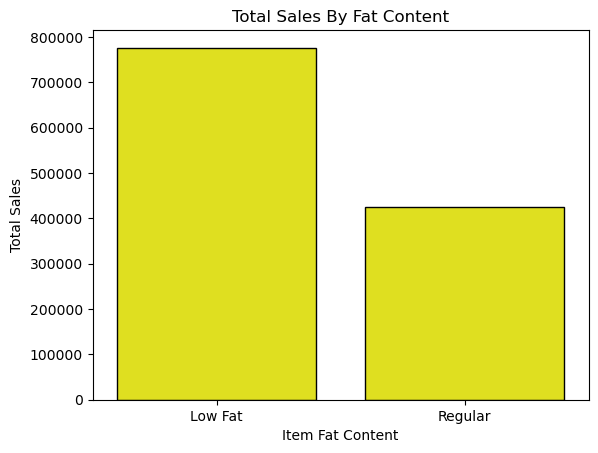

In [20]:
sns.barplot(sales_by_fat_content,color= "yellow",edgecolor= "black")
plt.title("Total Sales By Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Total Sales")
plt.show()

## **INSIGHTS**

### 1. **Low Fat items generate significantly higher total sales**

This suggests that customer preference in this dataset is strongly inclined toward Low Fat products, either due to:

* Higher demand for healthier options

* More variety of Low Fat products

* Better availability or stock

* More effective marketing
---

### 2. **Low Fat products contribute the majority of revenue**

* Low Fat accounts for ~65% of total sales.

* Regular Fat accounts for ~35%.

* This indicates that Low Fat products are a major revenue driver, and any business decision (stocking, pricing, promotions) should prioritize this category.
---

 ### 3. **Regular Fat products still represent a meaningful segment**

Even though lower, Regular items still contribute over ₹4 lakh+ in sales, meaning:

* They should not be ignored

* Improving promotions or product visibility may increase their performance

* They may have a loyal customer base

### **Total Sales By Item Type**

In [21]:
total_sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
print(total_sales_by_type)

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_24480\2181729241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)


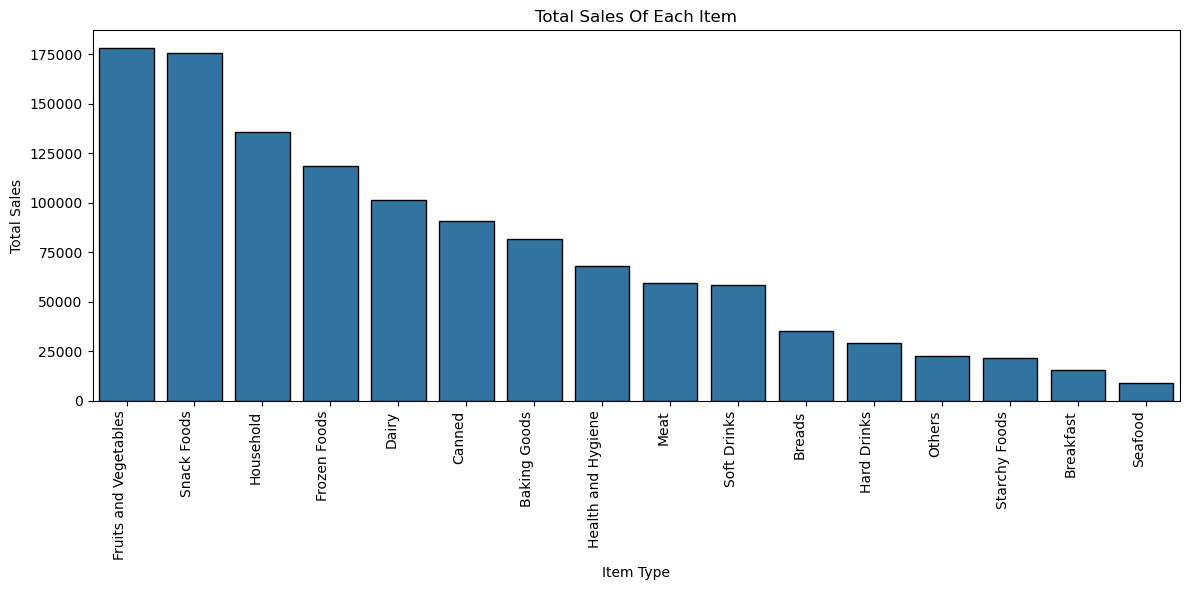

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=total_sales_by_type.index, y=total_sales_by_type.values,order = total_sales_by_type.index, edgecolor="black")
plt.title("Total Sales Of Each Item")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=60, ha='right')
plt.xticks(rotation=90)   # fix overlapping labels
plt.tight_layout()        # adjust spacing
plt.show()

### **INSIGHTS**

### 1. **Fruits & Vegetables and Snack Foods are the highest revenue generators**

These two categories show the largest total sales, indicating strong customer demand and frequent purchasing behavior.
This is common in retail because:

* These are fast-moving consumer goods (FMCG)

* High purchase frequency

* Essential and repeat-buy items

They play a major role in overall revenue.

---

 ### 2. **Categories like Frozen Foods, Dairy, and Baking Goods also show strong performance**

These mid-level categories contribute consistently to sales:

* They are essential cooking and household items

* They have stable demand

* They support overall basket value

This suggests that they should be kept well-stocked to maintain customer satisfaction.

---

 ### 3. **Lowest sales in categories like Seafood, Hard Drinks, and Starchy Foods**

These categories show very low total sales, indicating:

* Low customer preference

* Limited product range

* Possibly higher prices


These may require:

* Better visibility

* Promotions and discounts

* Reviewing assortment strategy
---

 ### 4. **Item Type distribution shows that customer purchase behavior varies widely**

Some categories are significantly more popular than others.
The sales distribution is not evenly spread, meaning:

* Business relies heavily on a few top categories

* Improving low-performing categories could boost overall revenue

* High-performing categories should be prioritized for inventory and marketing



### **Fat Content by Outlet for Total Sales**

In [40]:
sales_fc_outlet = df.groupby(["Outlet Identifier", "Item Fat Content"])["Sales"].sum().reset_index()
print(sales_fc_outlet)

   Outlet Identifier Item Fat Content       Sales
0             OUT010          Low Fat  51785.8296
1             OUT010          Regular  26345.7350
2             OUT013          Low Fat  86402.1448
3             OUT013          Regular  45406.8708
4             OUT017          Low Fat  82947.0458
5             OUT017          Regular  46156.9106
6             OUT018          Low Fat  84844.6070
7             OUT018          Regular  46633.1654
8             OUT019          Low Fat  48028.5354
9             OUT019          Regular  25779.0470
10            OUT027          Low Fat  83774.4110
11            OUT027          Regular  46940.2636
12            OUT035          Low Fat  86482.9174
13            OUT035          Regular  46620.9896
14            OUT045          Low Fat  85034.8102
15            OUT045          Regular  45907.9680
16            OUT046          Low Fat  84603.3212
17            OUT046          Regular  47510.0486
18            OUT049          Low Fat  82416.0560


C:\Users\PC\AppData\Local\Temp\ipykernel_24480\899492166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_fc_outlet = df.groupby(["Outlet Identifier", "Item Fat Content"])["Sales"].sum().reset_index()


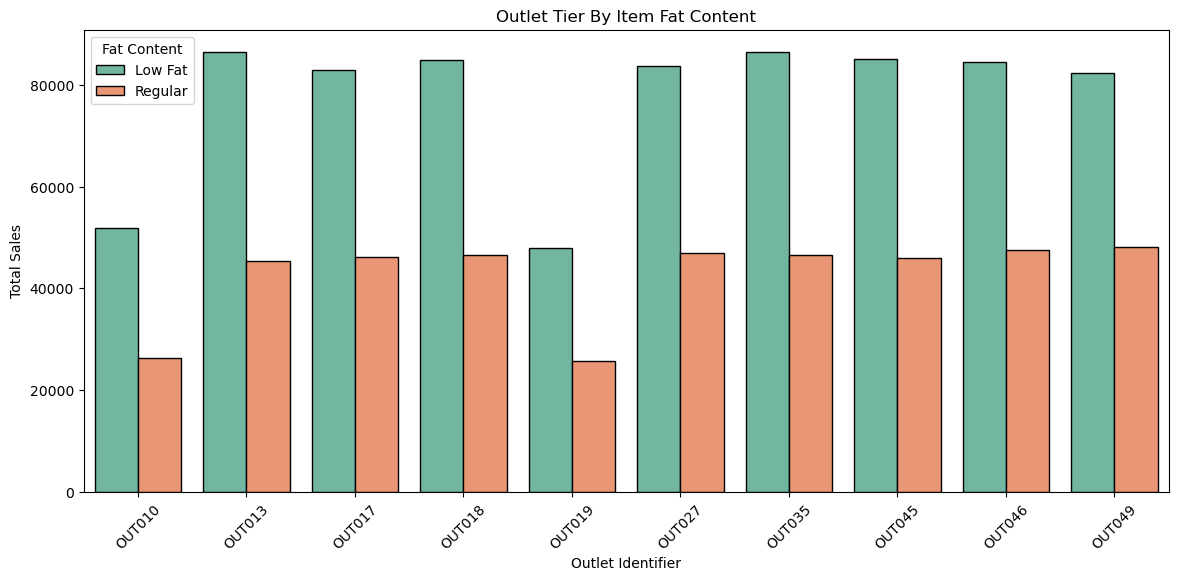

In [24]:
plt.figure(figsize=(14,6))

sns.barplot(
    data=sales_fc_outlet,
    x="Outlet Identifier",
    y="Sales",
    hue="Item Fat Content",
    palette="Set2",
    edgecolor="black"
)

plt.title("Outlet Tier By Item Fat Content")
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Fat Content")

plt.show()

### **INSIGHTS**



### 1️⃣  **Low-Fat items consistently generate higher sales across all outlets**

* Across every outlet (OUT010, OUT013, OUT017, etc.), the Low Fat category clearly outperforms the Regular Fat category.
* This indicates a strong customer preference toward healthier or low-fat product options.
---

### 2️⃣  **OUT013, OUT017, OUT018, OUT027, OUT035, OUT045 have the highest total sales**

These outlets show significantly higher sales, suggesting:

* They may be in high-demand locations

* They may have better inventory variety

* They may attract more customers looking for low-fat items
---
### 3️⃣  **Regular Fat product sales are stable but much lower**

Regular Fat items follow a consistent but significantly smaller volume, indicating:

* Moderate but steady demand

* Customers buy them, but they are not the primary sales drivers
---
### 4️⃣  **OUT019 has noticeably lower sales in both fat categories**

OUT019 stands out with much lower sales than other outlets.
Possible reasons:

* Smaller outlet size

* *ower footfall

* Poor product visibility

* Inventory limitation

* This is an outlet that needs sales improvement strategies.
---
### 5️⃣  **Gap between Low-Fat and Regular-Fat is very large**

In most outlets, Low-Fat sales are almost double or triple the Regular Fat sales.
Business implication:

* Marketing and stocking should prioritize Low-Fat products

* Regular Fat could be optimized (reduce SKUs, offer bundles, etc.)

### **Total Sales By Outlet Size**

In [25]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()
print(sales_by_size)

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_24480\3876005843.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = df.groupby("Outlet Size")["Sales"].sum()


Text(0.5, 1.0, 'Sales By Outlet Size')

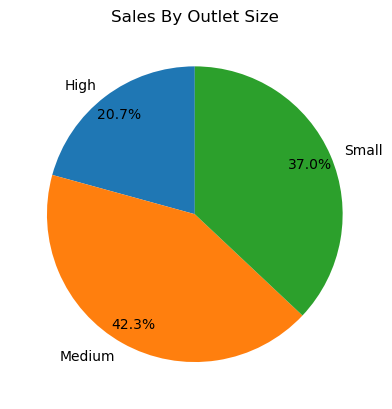

In [26]:
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90, 
    pctdistance=0.85
)
plt.title("Sales By Outlet Size")

### **INSIGHTS**




### **1️⃣ Medium-sized outlets generate the highest sales (42.3%)**

Medium outlets contribute the **largest share of total sales**, indicating that:

* They strike the right balance between **space, inventory capacity, and customer traffic**.
* They may be located in commercially active areas with steady demand.
* They could be the most cost-effective format for the business.

---

### **2️⃣ Small outlets also contribute significantly (37%)**

Despite limited space, small outlets produce **strong sales performance**:

* They are likely located in densely populated or easily accessible areas.
* Customers may prefer small outlets for **quick purchases**, leading to consistent sales.
* Their high performance suggests expansion of small-format stores could be profitable.

---

### **3️⃣ High-sized outlets generate the lowest sales (20.7%)**

Large outlets underperform compared to small and medium ones. Reasons could include:

* **Higher operational costs** without proportional revenue.
* Being located in low-traffic areas.
* Offering more space than necessary, causing inefficiency.
* Possible inventory mismanagement or low customer engagement.

This suggests that larger outlets are **not yielding enough return** relative to their size.

---



### **Total Sales By Outlet Location**

In [27]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)
print(sales_by_location)


Outlet Location Type
Tier 3    472133.0272
Tier 2    393150.6416
Tier 1    336397.8120
Name: Sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_24480\572359435.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)


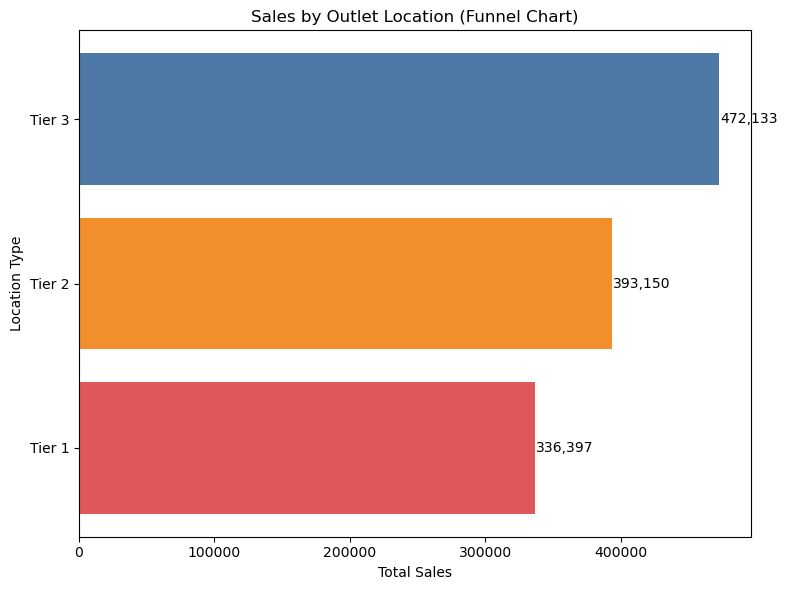

In [29]:
sales = sales_by_location.values
locations = sales_by_location.index

plt.figure(figsize=(8,6))

plt.barh(locations, sales, color=["#4e79a7", "#f28e2b", "#e15759"])   # funnel-like descending bars
plt.gca().invert_yaxis()  # highest value on top (funnel style)

# Labels and title
plt.xlabel("Total Sales")
plt.ylabel("Location Type")
plt.title("Sales by Outlet Location (Funnel Chart)")

# Add values on bars
for index, value in enumerate(sales):
    plt.text(value + 1000, index, f"{int(value):,}", va='center')

plt.tight_layout()
plt.show()

### **INSIGHTS**





### **1️⃣ Tier 3 locations have the highest sales**

Tier 3 outlets generate **₹472,133**, the highest among all tiers.
This indicates that:

* Tier 3 locations (typically suburban or semi-urban) have **strong customer demand**.
* Customers in these regions may rely more heavily on retail outlets due to fewer competitors.
* Lower competition and higher dependency likely drive higher sales volume.

---

### **2️⃣ Tier 2 locations contribute strongly but remain lower than Tier 3**

Tier 2 outlets generate **₹393,150** in sales, showing:

* A substantial customer base.
* Good demand for items, but possibly more competition or alternative shopping options.
* Still a very important market segment with consistent revenue.

---

### **3️⃣ Tier 1 locations record the lowest sales**

Tier 1 outlets generate **₹336,397**, which is the lowest of all tiers.
Possible reasons:

* **High competition** from supermarkets, online delivery platforms, and convenience stores.
* Customers have more choices, reducing dependency on a single outlet.
* Higher operating costs and higher-income shopping habits may shift purchases to premium channels.

---



### **Total Sales By Outlet Establishment Year**

In [35]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().reset_index()
print(sales_by_year)

   Outlet Establishment Year        Sales
0                       1998  204522.2570
1                       2000  131809.0156
2                       2010  132113.3698
3                       2011   78131.5646
4                       2012  130476.8598
5                       2015  130942.7782
6                       2017  133103.9070
7                       2020  129103.9564
8                       2022  131477.7724


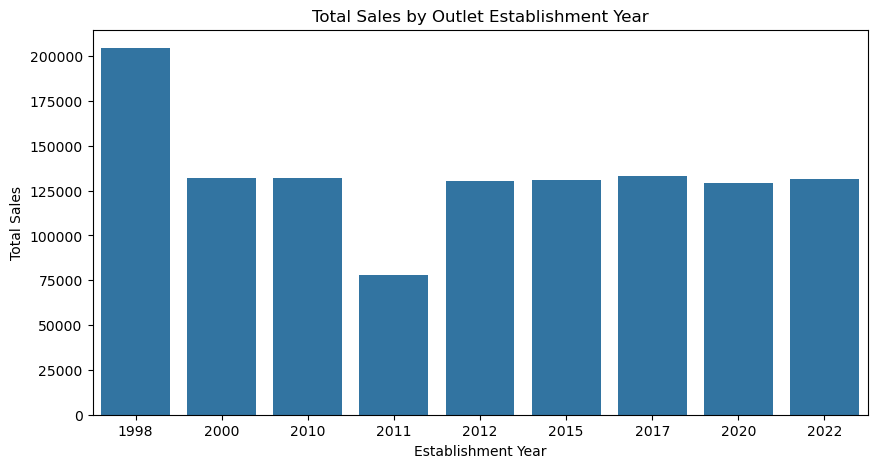

In [39]:
plt.figure(figsize=(10,5))
sns.barplot( data=sales_by_year, 
            x=sales_by_year["Outlet Establishment Year"].astype(str), 
            y="Sales")
plt.title("Total Sales by Outlet Establishment Year")
plt.xlabel("Establishment Year")
plt.ylabel("Total Sales")
plt.show()


### **INSIGHTS**



### **1️⃣ Outlets established in 1998 generate the highest total sales**

The outlet from **1998** shows **significantly higher sales** than any other year.
Possible reasons:

* It is the **oldest**, meaning it has a **well-established customer base**.
* Strong brand presence due to long-term loyalty.
* Possibly located in a high-demand region.

This suggests that **mature outlets perform better** than newly established ones.

---

### **2️⃣ A decline is visible for outlets established between 2010–2011**

Outlets from:

* **2010**
* **2011**

show noticeably lower sales compared to other years, especially **2011**, which records the **lowest total sales**.

Possible interpretations:

* These outlets may be in low-performing areas.
* They might not have scaled operations effectively.
* Customer reach or visibility could be limited.

These outlets may require **operational improvement or marketing support**.

---

### **3️⃣ Outlets from 2012 onward show stable but moderate sales**

Years **2012, 2015, 2017, 2020, and 2022** have sales clustered around the same range.

This indicates:

* Newer outlets perform **consistently**, but not exceptionally.
* They may still be building their customer base.
* Operations are standardized across newer openings.

This consistency is good, but the lack of growth compared to older outlets suggests potential for optimization.

---

### **4️⃣ No dramatic growth for new outlets (2020 & 2022)**

Even the most recently established outlets (2020 and 2022) do **not** outperform earlier ones.

This may point to:

* Saturated markets
* Higher competition
* Need for modern retail strategies (delivery tie-ups, promotions, etc.)

---






#  **Conclusion**

The Blinkit Sales Analysis provides valuable insights into how product characteristics, outlet attributes, and geographic differences influence overall business performance. The analysis shows that **low-fat products consistently outperform regular-fat items**, indicating a strong customer preference for healthier options. **Medium outlet sizes generate the highest share of revenue**, followed closely by small outlets, highlighting the efficiency and effectiveness of compact retail formats.

The study also reveals that **Tier 3 locations contribute the most to total sales**, suggesting high customer dependency on Blinkit in semi-urban or developing areas. Conversely, Tier 1 outlets generate the lowest revenue—possibly due to higher competition and greater availability of alternative shopping options.

Outlets established earlier, especially those from **1998**, display significantly higher sales due to established customer trust and strong brand presence. Meanwhile, outlets from **2010–2011 show lower performance**, indicating potential operational issues or weaker market presence. Newer outlets (2012 onwards) present steady but moderate sales, suggesting room for strategic improvement.

Overall, the analysis highlights strong product categories, profitable outlet segments, and high-performing locations, while identifying underperforming areas that require targeted strategies.

---

#  **Recommendations**

Based on the findings, the following recommendations can help Blinkit improve sales, optimize operations, and enhance customer satisfaction:

### **1️⃣ Prioritize Low-Fat and Best-Selling Product Categories**

* Increase stock and variety of high-performing low-fat items.
* Promote these through discounts, combos, or featured listings.

### **2️⃣ Focus on High-Performing Outlet Sizes**

* **Medium** outlets show the highest sales—consider expanding medium-format stores.
* **Small outlets** also perform strongly; optimizing their inventory can further improve revenue.

### **3️⃣ Improve or Re-strategize Large Outlets**

* Large outlets underperform and may have high operational costs.
* Conduct audits to identify issues—location, layout, staffing, or inventory inefficiency.
* Optimize or downscale poorly performing stores.

### **4️⃣ Expand Presence in Tier 3 and Tier 2 Locations**

* These areas generate the highest sales and show high customer engagement.
* Investing in more outlets in these tiers may significantly boost revenue.

### **5️⃣ Rework Strategy for Tier 1 Outlets**

* Tier 1 outlets face intense competition from supermarkets and online delivery apps.
* Introduce loyalty programs, express delivery, or exclusive city offers to retain customers.

### **6️⃣ Improve Performance of 2010–2011 Established Outlets**

* These outlets show the lowest sales.
* Conduct a root-cause analysis focusing on:

  * Customer feedback
  * Inventory assortment
  * Outlet visibility
  * Staff efficiency

### **7️⃣ Enhance Customer Ratings**

* Introduce quality checks, faster delivery slots, and customer-centric policies.
* Poor ratings directly impact product visibility and customer trust.

### **8️⃣ Consider Data-Driven Inventory Planning**

* Stock high-demand items in high-performing outlet sizes and high-tier locations.
* Reduce low-performing items to avoid dead stock and improve margins.

---

